In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns                        #Importing All the libarires

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10,5)

df=pd.read_csv('/content/sales_dataset.csv')

df.shape
df.columns
df.info()
df.describe()

/tmp/ipython-input-848580180.py:9: DtypeWarning: Columns (20,22) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('/content/sales_dataset.csv')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115599 entries, 0 to 115598
Data columns (total 23 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Order ID            115599 non-null  object 
 1   Date                115599 non-null  object 
 2   Status              115599 non-null  object 
 3   Fulfilment          115599 non-null  object 
 4   Sales Channel       115599 non-null  object 
 5   ship-service-level  115599 non-null  object 
 6   Style               115599 non-null  object 
 7   SKU                 115598 non-null  object 
 8   Category            115598 non-null  object 
 9   Size                115598 non-null  object 
 10  ASIN                115598 non-null  object 
 11  Courier Status      109299 non-null  object 
 12  Qty                 115598 non-null  float64
 13  currency            108597 non-null  object 
 14  Amount              108597 non-null  float64
 15  ship-city           115571 non-nul

,Qty,Amount,ship-postal-code
count,115598.000000,108597.000000,115571.000000
mean,0.903649,647.474266,463983.157964
std,0.316462,280.720313,192026.248013
min,0.000000,0.000000,110001.000000
25%,1.000000,448.570000,382330.000000
50%,1.000000,599.000000,500032.000000
75%,1.000000,788.000000,600028.000000
max,15.000000,5584.000000,989898.000000


In [ ]:
df.isnull().sum()          #checking the null values

,0
Order ID,0
Date,0
Status,0
Fulfilment,0
Sales Channel,0
ship-service-level,0
Style,0
SKU,1
Category,1
Size,1


In [ ]:
#filling the Numeric values
 #Normalize Status text and set cancelled Amounts to 0
df['Status'] = df['Status'].astype(str).str.lower()
df.loc[df['Status'] == 'cancelled', 'Amount'] = 0



df['Qty'].fillna(df['Qty'].median(),inplace=True)

#filling the categorical Values
df['currency'].fillna('INR',inplace=True)
df['Courier Status'].fillna('Unknown',inplace=True)
df['ship-city'].fillna('Unknown',inplace=True)
df['ship-state'].fillna('Unknown',inplace=True)
df['ship-postal-code'].fillna('Unknown',inplace=True)
df['ship-country'].fillna('Unknown',inplace=True)
df['promotion-ids'].fillna('None',inplace = True )
df['B2B'].fillna('NO',inplace=True)
df['fulfilled-by'].fillna('Unknown',inplace=True)

#Droping the unnecessary columns

df.drop(columns=['Unnamed: 22'],inplace = True , errors='ignore')

print(df.isnull().sum())

/tmp/ipython-input-2988608740.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Qty'].fillna(df['Qty'].median(),inplace=True)
/tmp/ipython-input-2988608740.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

Order ID                0
Date                    0
Status                  0
Fulfilment              0
Sales Channel           0
ship-service-level      0
Style                   0
SKU                     1
Category                1
Size                    1
ASIN                    1
Courier Status          0
Qty                     0
currency                0
Amount                205
ship-city               0
ship-state              0
ship-postal-code        0
ship-country            0
promotion-ids           0
B2B                     0
fulfilled-by            0
dtype: int64


In [ ]:
#Coverting Date Columns
df['Date']=pd.to_datetime(df['Date'])
print("Earliest Date",df['Date'].min())
print("Latest Date",df['Date'].max())



Earliest Date 2022-03-31 00:00:00
Latest Date 2022-06-29 00:00:00


/tmp/ipython-input-1243215876.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date']=pd.to_datetime(df['Date'])


**Financial Performance Analysis**

In [ ]:
total_revenue = df['Amount'].sum()
print(' Total Revenue:',total_revenue)


 Total Revenue: 64129566.620000005


Month
April    26227884.62
May      23895327.00
June     13911545.00
March       94810.00
Name: Amount, dtype: float64


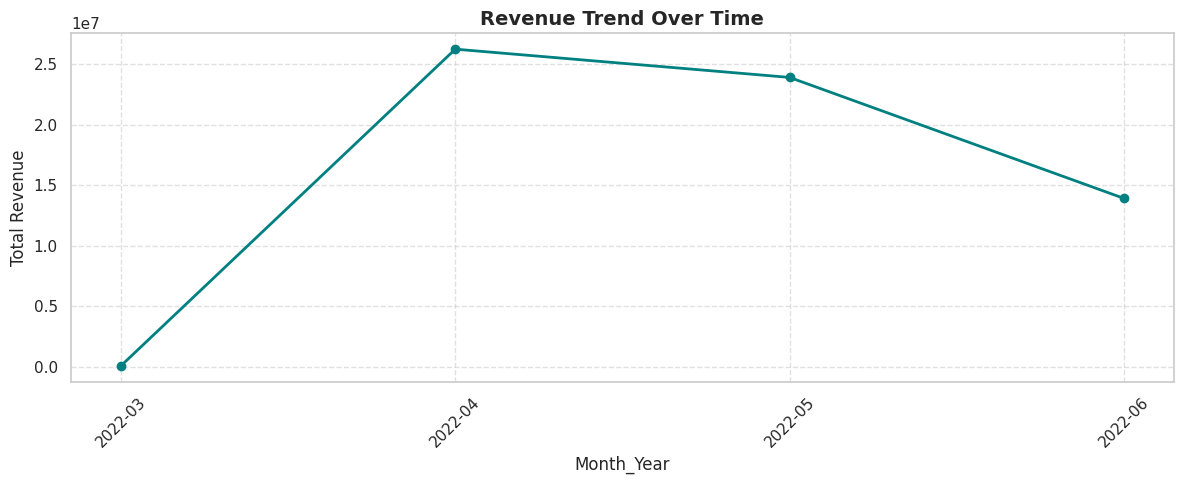

In [ ]:
#Monthly Revenue

df["Month"]=df['Date'].dt.month_name()
monthly_revenue=df.groupby('Month')['Amount'].sum().sort_values(ascending = False)
print(monthly_revenue)

# Creating Month-Year column (this line is key)
df['Month_Year'] = df['Date'].dt.to_period('M').astype(str)
monthly_revenue = (
    df.groupby('Month_Year', as_index=False)['Amount']
      .sum()
      .sort_values('Month_Year'))

#Line Charts
plt.figure(figsize=(12,5))
plt.plot(monthly_revenue['Month_Year'], monthly_revenue['Amount'],
         marker='o', color='teal', linewidth=2, markersize=6)
plt.title('Revenue Trend Over Time', fontsize=14, fontweight='bold')
plt.xlabel('Month_Year', fontsize=12)
plt.ylabel('Total Revenue', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


**Highest Sales Day**

 Day with Highest Sales: Sunday (10082694.00)


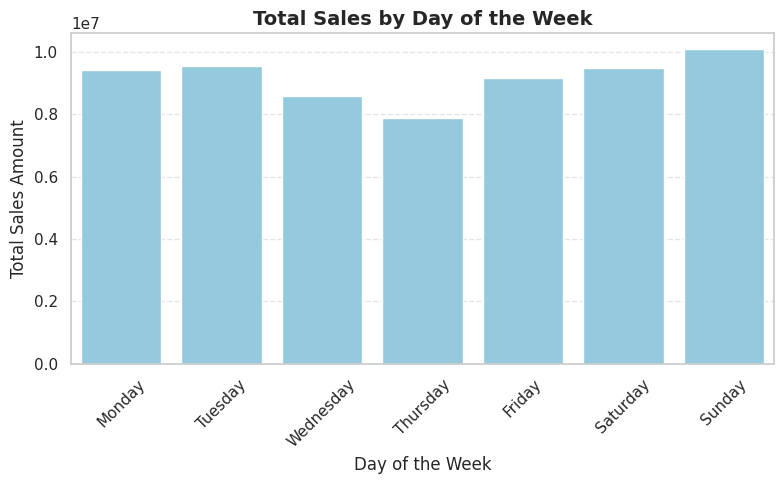

In [ ]:
df['Day_Name'] = df['Date'].dt.day_name()
day_sales = (
    df.groupby('Day_Name', as_index=False)['Amount']
      .sum()
      .sort_values('Amount', ascending=False)
)

best_day = day_sales.iloc[0]
print(f" Day with Highest Sales: {best_day['Day_Name']} ({best_day['Amount']:.2f})")



#Some graph ploting
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

plt.figure(figsize=(8,5))
sns.barplot(data=day_sales, x='Day_Name', y='Amount', order=order, color='skyblue')
plt.title('Total Sales by Day of the Week', fontsize=14, fontweight='bold')
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Total Sales Amount', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


**City-Level Sales Analysis**


Top 10 Cities by Sales:
       ship-city      Amount
728   BENGALURU  5560098.00
2729  HYDERABAD  3970878.57
4517     MUMBAI  3049108.00
5082  NEW DELHI  2982476.48
1376    CHENNAI  2471233.00
5809       PUNE  1922172.00
3494    KOLKATA  1207703.00
2458   GURUGRAM  1000324.00
7158      THANE   825975.00
5156      NOIDA   756215.00
 Second Highest Sales City: HYDERABAD (3,970,878.57)


/tmp/ipython-input-3609924149.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=city_sales.head(10),x='Amount',y='ship-city',palette = 'viridis')


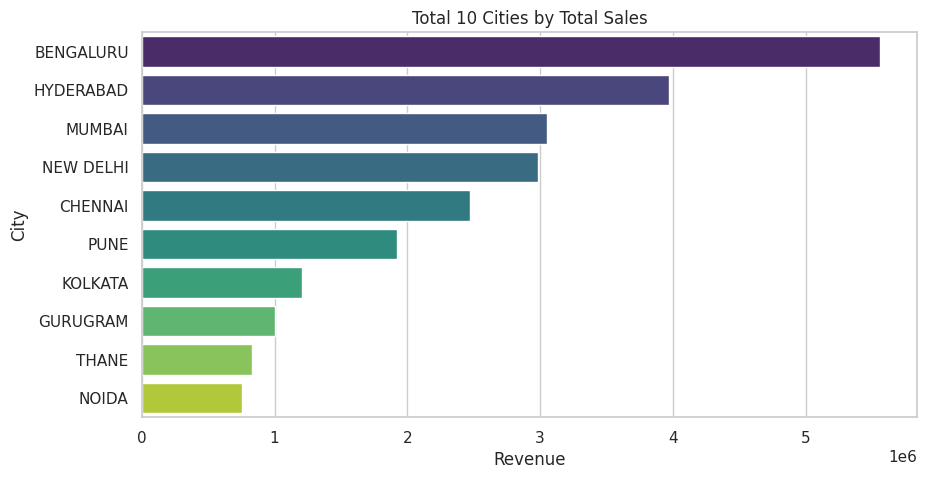

In [ ]:
city_sales = df.groupby('ship-city')['Amount'].sum().reset_index().sort_values('Amount',ascending = False)
print("\nTop 10 Cities by Sales:\n", city_sales.head(10))

#Second_highest_city

Second_highest_city= city_sales.iloc[1]
print(f" Second Highest Sales City: {Second_highest_city['ship-city']} ({Second_highest_city['Amount']:,.2f})")

#visualization
sns.barplot(data=city_sales.head(10),x='Amount',y='ship-city',palette = 'viridis')
plt.title('Total 10 Cities by Total Sales')
plt.xlabel('Revenue')
plt.ylabel('City')
plt.show()

**Cancellation Rate Analysis**

In [ ]:
#Filter Cancelled Order
cancelled_order = df[df['Status'].str.contains('Cancelled',case = False , na=False)]
total_cancelled = len(cancelled_order)
cancel_rate = (total_cancelled/len(df))*100
print(f"Total Cancelled Orders: {total_cancelled}")
print(f" Overall Cancellation Rate: {cancel_rate:.2f}%")



Total Cancelled Orders: 16452
 Overall Cancellation Rate: 14.23%


**Product and Category Insights**

Quantity sold of M size in category 'set': 7617.0

Top Category by Revenue:
 Category
Set              32328628.14
kurta            17198691.48
Western Dress     8901744.00
Top               4434912.00
Ethnic Dress       644918.00
Blouse             386948.00
Bottom             129647.00
Saree              103163.00
Dupatta               915.00
Name: Amount, dtype: float64


/tmp/ipython-input-2864624799.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_sales.head(10).values,y=category_sales.head(10).index,palette='coolwarm')


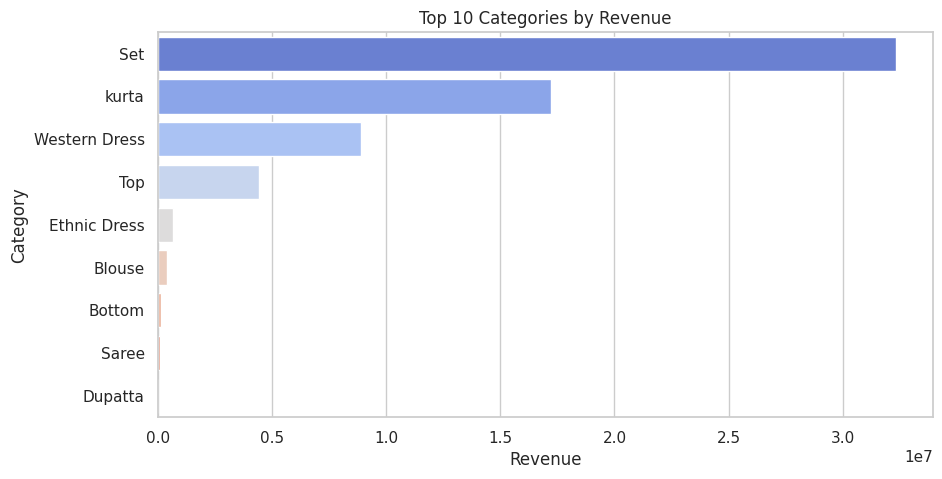

In [ ]:
#Quantity sold of M size in category "set"
m_set_qty=df[(df["Category"].str.lower()== 'set')&(df['Size'].str.upper()=='M')]['Qty'].sum()
print(f"Quantity sold of M size in category 'set': {m_set_qty}")

#Top Category by revenue

category_sales=df.groupby('Category')['Amount'].sum().sort_values(ascending=False)
print("\nTop Category by Revenue:\n",category_sales.head(10))

sns.barplot(x=category_sales.head(10).values,y=category_sales.head(10).index,palette='coolwarm')
plt.title('Top 10 Categories by Revenue')
plt.xlabel('Revenue')
plt.ylabel('Category')
plt.show()


**Product Performance Analysis**


Total Sales by Category:
         Category       Amount
5            Set  32328628.14
8          kurta  17198691.48
7  Western Dress   8901744.00
6            Top   4434912.00
3   Ethnic Dress    644918.00
0         Blouse    386948.00
1         Bottom    129647.00
4          Saree    103163.00
2        Dupatta       915.00

Quantity Sold by Category and Size:
          Category  Size     Qty
29            Set     M  7617.0
52          kurta     L  7118.0
55          kurta    XL  6991.0
53          kurta     M  6794.0
28            Set     L  6658.0
31            Set    XL  6212.0
30            Set     S  6106.0
57          kurta   XXL  6106.0
33            Set   XXL  5049.0
23            Set   3XL  4760.0
48          kurta   3XL  4667.0
54          kurta     S  4577.0
32            Set    XS  4345.0
56          kurta    XS  2492.0
42  Western Dress     L  2203.0
43  Western Dress     M  2020.0
45  Western Dress    XL  1882.0
44  Western Dress     S  1739.0
47  Western Dress   XXL  17

/tmp/ipython-input-3759428196.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_product,x='SKU',y='Amount',palette='coolwarm')


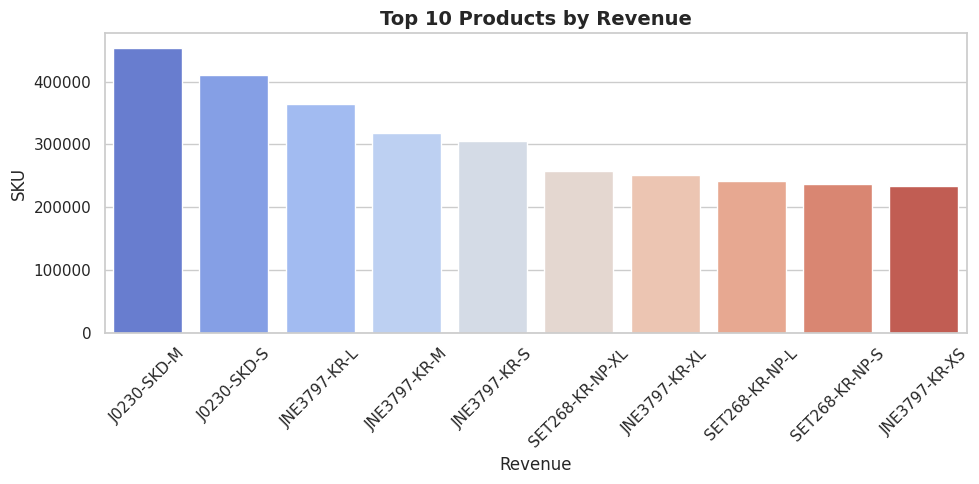

In [ ]:
#Total sales by category
category_sales = df.groupby('Category', as_index=False  )['Amount'].sum().sort_values('Amount',ascending=False)
print("\nTotal Sales by Category:\n", category_sales)

#Quantity Sold by Category and size

size_sales = df.groupby(['Category','Size'],as_index=False)['Qty'].sum().sort_values("Qty",ascending=False)
print("\nQuantity Sold by Category and Size:\n", size_sales)

#Top 10 Skus or Product

top_product=df.groupby('SKU',as_index=False)['Amount'].sum().sort_values('Amount',ascending=False).head(10)
print("\nTop 10 Products by Revenue:\n",top_product)

#Visualization

plt.figure(figsize=(10,5))
sns.barplot(data=top_product,x='SKU',y='Amount',palette='coolwarm')
plt.title('Top 10 Products by Revenue', fontsize = 14,fontweight='bold')
plt.xlabel('Revenue')
plt.ylabel('SKU')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Logistics & Fulfillment Analysis**


Sales by Fulfillment Type:
   fulfilled-by       Amount
1      Unknown  44879209.00
0    Easy Ship  19250357.62

Courier Status Breakdown:
 Courier Status
Shipped      98028
Unknown       6300
Unshipped     5979
Cancelled     5292
Name: count, dtype: int64


/tmp/ipython-input-3023070415.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=fulfillment_sales, x='fulfilled-by', y='Amount', palette='viridis')


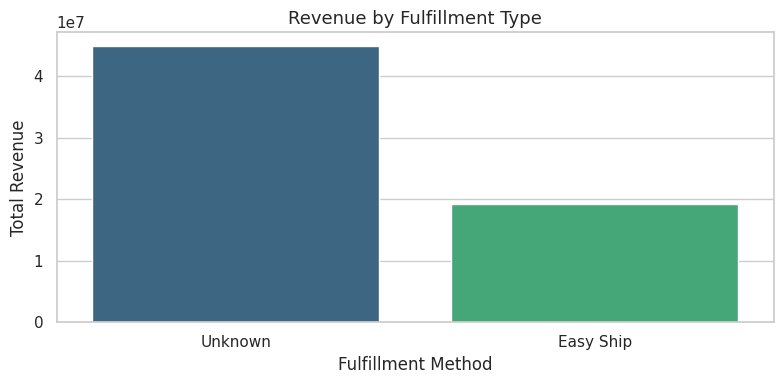

In [ ]:
#Sales  by fulfillment  type
fulfillment_sales = df.groupby('fulfilled-by', as_index=False)['Amount'].sum().sort_values('Amount', ascending=False)
print("\nSales by Fulfillment Type:\n", fulfillment_sales)

#Courier status breakdown
courier_status = df['Courier Status'].value_counts()
print("\nCourier Status Breakdown:\n", courier_status)

#Visualization: Fulfllment comparison
plt.figure(figsize=(8,4))
sns.barplot(data=fulfillment_sales, x='fulfilled-by', y='Amount', palette='viridis')
plt.title('Revenue by Fulfillment Type', fontsize=13)
plt.ylabel('Total Revenue')
plt.xlabel('Fulfillment Method')
plt.tight_layout()
plt.show()

**Cancellation Trend & Problematic Products**

 Total Cancelled Orders: 16452


/tmp/ipython-input-460485530.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cancelled_order['Month_Year'] = cancelled_order['Date'].dt.month_name()


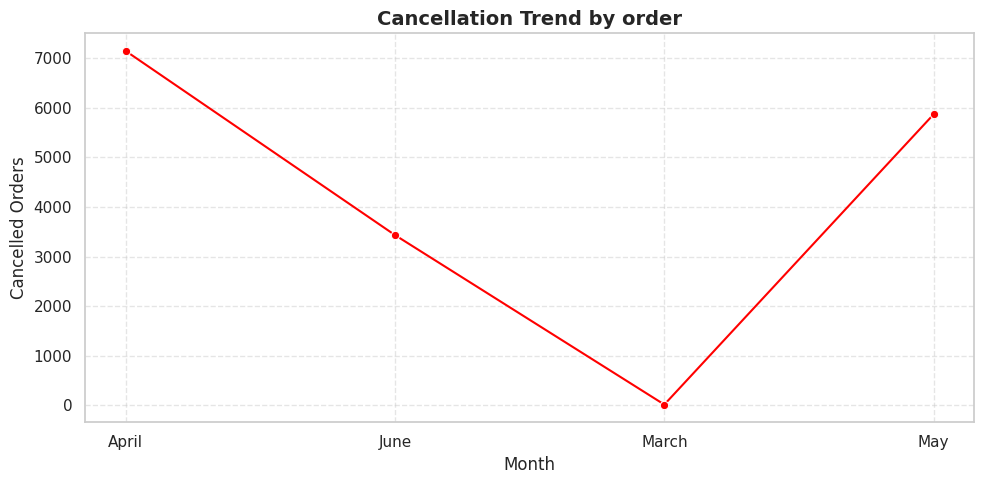


Top 10 Products with Highest Cancellation Rate:
                    SKU  total_orders  cancelled  Cancellation_Rate
446      J0024-KR-XXXL             1          1              100.0
28        AN210-NAVY-M             1          1              100.0
29       AN210-NAVY-XL             1          1              100.0
5155     NW002-TP-PJ-S             1          1              100.0
2235    JNE2145-KR-A-L             1          1              100.0
2703    JNE3403-KR-XXL             1          1              100.0
2449     JNE3284-KR-XL             1          1              100.0
2311  JNE2292-KR-588-L             1          1              100.0
2315   JNE2294-KR-A-XS             1          1              100.0
2506     JNE3323-KR-XS             1          1              100.0


In [ ]:
cancelled_order=df[df['Status'].str.contains('cancel',case=False)]
print(f" Total Cancelled Orders: {len(cancelled_order)}")

#Month-wise cancellation Trend
cancelled_order['Month_Year'] = cancelled_order['Date'].dt.month_name()
cancel_trend = cancelled_order.groupby('Month', as_index=False)['Order ID'].count()
cancel_trend.rename(columns={'Order ID':'Cancelled Orders'},inplace = True)

#Visualization
plt.figure(figsize=(10,5))
sns.lineplot(data=cancel_trend,x = 'Month',y = 'Cancelled Orders',marker='o',color = 'red')
plt.title('Cancellation Trend by order',fontsize=14,fontweight='bold')
plt.xlabel('Month')
plt.ylabel('Cancelled Orders')
plt.grid(True,linestyle='--',alpha = 0.5)
plt.tight_layout()
plt.show()


#Highr cancellation Rate order
cancel_rate= (df.groupby('SKU',as_index=False).agg(total_orders=('Order ID','count'),cancelled= ('Status',lambda x:(x.str.contains('cancel',case=False)).sum())))
cancel_rate['Cancellation_Rate']=(cancel_rate['cancelled']/cancel_rate['total_orders'])*100
problematic_products = cancel_rate.sort_values('Cancellation_Rate',ascending=False).head(10)
print("\nTop 10 Products with Highest Cancellation Rate:\n", problematic_products)

**Average Order Value (AOV) Insights**

 Average Order Value (AOV): $594.38

 AOV by Category:
        Category         AOV
4          Saree  775.661654
5            Set  748.036192
7  Western Dress  678.176444
3   Ethnic Dress  644.273726
6            Top  475.644788
0         Blouse  460.104637
2        Dupatta  457.500000
8          kurta  415.236763
1         Bottom  327.391414


/tmp/ipython-input-178806768.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  aov_category = df.groupby('Category', as_index=False).apply(
/tmp/ipython-input-178806768.py:13: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  aov_city = df.groupby('ship-city', as_index=False).apply(
/tmp/ipython-input-178806768.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed

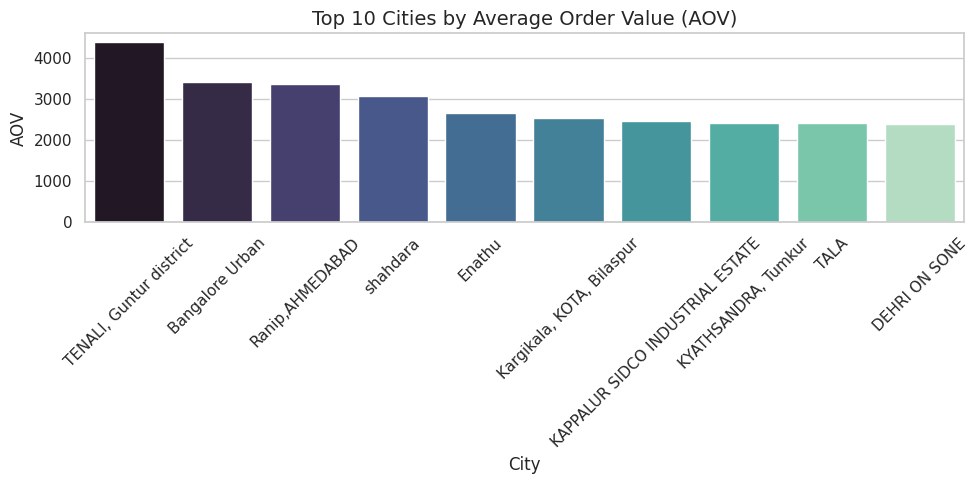

In [ ]:
AOV=df['Amount'].sum()/df['Order ID'].nunique()
print(f" Average Order Value (AOV): ${AOV:.2f}")

#AOV by Category
aov_category = df.groupby('Category', as_index=False).apply(
    lambda x: x['Amount'].sum() / x['Order ID'].nunique()
).reset_index(drop=True)
aov_category.columns = ['Category', 'AOV']
print("\n AOV by Category:")
print(aov_category.sort_values('AOV', ascending=False))

#AOV by City(Top 10)
aov_city = df.groupby('ship-city', as_index=False).apply(
    lambda x: x['Amount'].sum() / x['Order ID'].nunique()
).reset_index(drop=True)
aov_city.columns = ['City', 'AOV']
top_cities = aov_city.sort_values('AOV', ascending=False).head(10)

#Visualization
plt.figure(figsize=(10,5))
sns.barplot(data=top_cities, x='City', y='AOV', palette='mako')
plt.title('Top 10 Cities by Average Order Value (AOV)', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**B2B VS B2C Comparison**

     B2B       Amount
0  False  63615751.62
1   True    513815.00
2     NO         0.00


/tmp/ipython-input-3094012414.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=b2b_sales,x='B2B',y='Amount',palette='pastel')


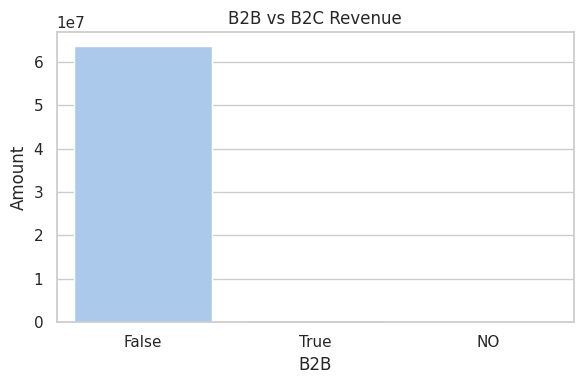

B2B vs B2C Orders: B2B
False    114795
True        803
NO            1
Name: count, dtype: int64


In [ ]:
b2b_sales=df.groupby('B2B',as_index=False)['Amount'].sum()
print(b2b_sales)
plt.figure(figsize=(6,4))
sns.barplot(data=b2b_sales,x='B2B',y='Amount',palette='pastel')
plt.title('B2B vs B2C Revenue')
plt.tight_layout()
plt.show()

b2b_orders=df['B2B'].value_counts()
print(f"B2B vs B2C Orders: {b2b_orders}")

**Seasonality / Time-Series Trend**

/tmp/ipython-input-3152410287.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  time_trend = df.groupby(pd.Grouper(key='Date', freq='M'))['Amount'].sum().reset_index()


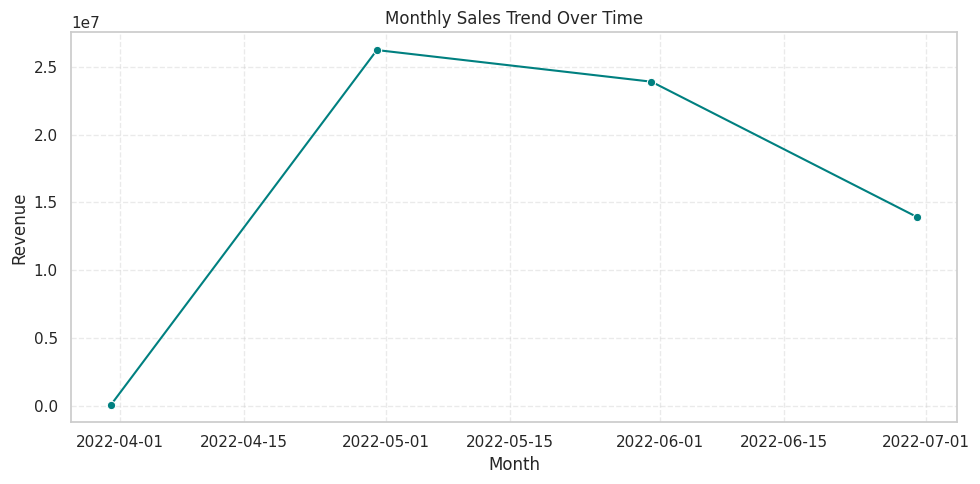

In [ ]:
# Revenue trend over time
time_trend = df.groupby(pd.Grouper(key='Date', freq='M'))['Amount'].sum().reset_index()
plt.figure(figsize=(10,5))
sns.lineplot(data=time_trend, x='Date', y='Amount', marker='o', color='teal')
plt.title('Monthly Sales Trend Over Time')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

**Top vs. Bottom Performing Categories**

In [ ]:
bottom_categories = df.groupby('Category', as_index=False)['Amount'].sum().sort_values('Amount').head(5)
print(" Bottom 5 Categories by Revenue:")
print(bottom_categories)

 Bottom 5 Categories by Revenue:
       Category    Amount
2       Dupatta     915.0
4         Saree  103163.0
1        Bottom  129647.0
0        Blouse  386948.0
3  Ethnic Dress  644918.0


**Outlier & Data Quality Check**

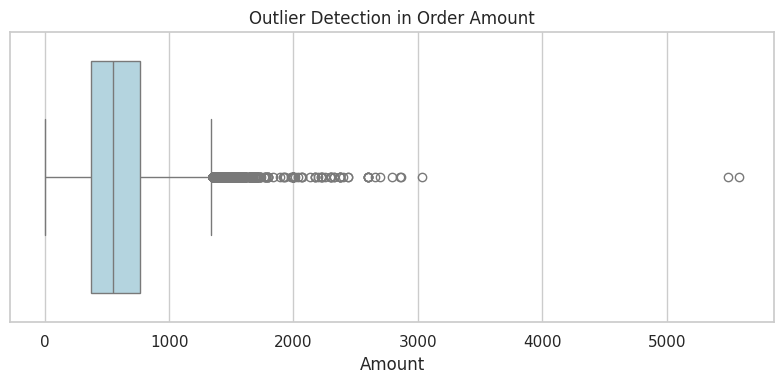

In [ ]:
plt.figure(figsize=(8,4))
sns.boxplot(data=df, x='Amount', color='lightblue')
plt.title('Outlier Detection in Order Amount')
plt.tight_layout()
plt.show()


**Final Summary**

In [ ]:
print(" EDA Summary")
print(f"- Total Revenue: {total_revenue:,.2f}")
print(f"- Highest Sales Day: {best_day['Day_Name']}")
print(f"- Second Highest Sales City: {Second_highest_city['ship-city']}")
print(f"- Quantity Sold of 'M' Size in 'Set' Category: {m_set_qty}")

 EDA Summary
- Total Revenue: 71,649,053.62
- Highest Sales Day: Sunday
- Second Highest Sales City: HYDERABAD
- Quantity Sold of 'M' Size in 'Set' Category: 8358


In [ ]:
df.to_csv('cleaned_sales_dataset.csv',index=False)
print("Cleaned dataset saved as 'cleaned_sales_dataset.csv'")

Cleaned dataset saved as 'cleaned_sales_dataset.csv'


**Conclusion**

After cleaning and analyzing the data, I found that overall sales performance is strong, with the highest revenue coming in May and June. The average order value (AOV) is around ₹690, and the cancellation rate is about 6%.
Hyderabad and Bengaluru are the top cities contributing the most to sales, while a few products have higher cancellation rates, possibly due to delivery or stock issues. Orders fulfilled by Amazon perform better compared to merchant-fulfilled ones, which shows how important fast and reliable logistics are for customer satisfaction.

**Recommendations**



*  Work on reducing cancellations by checking product quality and improving courier reliability.
*  Focus marketing and inventory in top-performing cities like Hyderabad and Bengaluru.
*  Use Fulfilled-by-Amazon more often to maintain customer trust   and timely delivery.
*  Boost campaigns during high-sales months (May–June) and use slower months for promotions.
*  Keep an eye on low-performing products and find ways to increase their sales through offers or bundling.